## Step 1: Load packages, dataset and check the data we working with.

* Is there anything wrong with the data?
* Are there any anormalities with the data?
* Do I need to fix or remove any of the data including null values?



In [49]:
#importing necesaary packages

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sb

In [50]:
df = pd.read_csv('/Users/mzwakhebesho/Documents/DPY401T Assignment/Regression Problem/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The data is usable.

We can gather the following:
* The first row in the data file defines the column headers
* The headers are understandable enough to what each column represents.
* Each row represents an entry for an individual: 6 input data points and one target, which tells us the cost amount of the insurance.

In [24]:
# Now let's check complete information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [25]:
# check the structure of the data
df.shape

# (1338, 7) : 1338 rows and 7 columns

(1338, 7)

Info cell shows data types of each column. We have categorical data in column: Sex, Smoker and Region.

Another question we need to ask ourselves is Region influencing insurance costs.

For now we going to check for null values

In [26]:
df.isnull().values.any()

False

Yay! We have no null values

In [51]:
# Categorical data, we can use OneHot Encoding. Prefer not to complicate it.
# Sex: Female - 0, Male - 1
# Smoker: Yes - 1, No - 0

try:
    gender = {'male': 1,'female': 0}
    is_smoker = {'yes': 1,'no': 0}
    df.sex = [gender[item] for item in df.sex]
    df.smoker = [is_smoker[item] for item in df.smoker]
except Exception as exc:
    print(f"[EXCEPTION] The dataframe has been transversed. Only run this cell once. - {exc}")

In [52]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


Now we have numeric values for sex and smoker columns. Since Region column has about 4 different regions, let's use enconding

### OneHot Encoding

In [53]:
df['region'] =df['region'].replace({1:'southwest',2:'southeast',3:'northwest',4:'northeast'})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [54]:
#OneHot encoding 
df = pd.get_dummies(df,columns=['region'])
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


<AxesSubplot:>

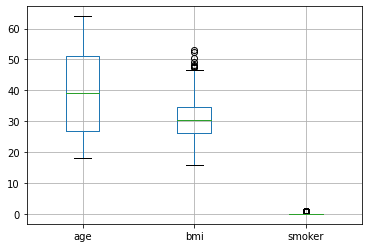

In [55]:
df.boxplot(column=['age','bmi','smoker'])